## Final Capstone Project : Exploring Toronto neighborhood for opening an Indian Restaurant



### Problem Statement:
Toronto. It's one of the most popular Canadian city among Indian and there is a thick population of Indian origin Canadian citizen observed in the city. Our business problem is to find out a suitable neighborhood in Toronto where one should consider to open Indian restaurant to attract and serve authentic Indian food to maximum customer which would help to expand the business among Indian population and to make it profitable.

### Target audience:
1. The Investor/Businessman who wants to invest in the Indian Restaurant startup and slowly expand their footprint in the segment to make it more profitable.

2. The professionals in different fields who wants to own an Indian restaurant will be beneficial from this project by understanding different pros and cons, the competition in the field one can expect, analyzing the expected customer footfall to generate profitability and to become a successful entrepreneur.

3. The Indian crowd living in areas who wants to taste the authentic food of India but having limited option will be beneficial from this project.

### Data Capture, Cleansing, Formatting
in order to execute the project, following dataset will be used.

#### 1. List of postal code and Neighborhood in Toronto Canada : 
Data will be downloaded from wiki to get the complete list of postal codes in Toronto along with Borough and neighborhoods.

(https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

#### 2. Geospatial data : 
In order to get the coordinates of different neighborhood downloaded above, geospatial data will be used.

(https://cocl.us/Geospatial_data)

#### 3. Ethnic population of Toronto: 
Success of a ethnic food chain depends on the ethnic population residing in the area of food chain. Toronto Ethnic population data will be used to find out densely Indian populated neighborhood to use in analysis.

(https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity)

#### 4. Location data using Foursquare API: 
To get different information, location about popular venues of Toronto, foursquare API will be used.

### Approach
We will use the location data and ethnic population data to find out those areas where dense Indian population is residing. With the help of venue details retrieved from foursquare, will get the areas having Indian restaurants
Then using K Means clustering and segmentation technique, will find out the areas having large indian population with less Indian restaurant which can be considered to open a Restaurant with high chance of maximum footfall and less competition.


##### Below Section will have data preperation for final project 

##### Importing Required libraries

In [50]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 
from sklearn.cluster import KMeans 

In [2]:
pip install folium

     |████████████████████████████████| 94 kB 6.1 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium

## Data Preperation

### 1. List of postal code and Neighborhood in Toronto Canada 
Downloading Toronto Neighbourhood data from wiki

In [4]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


Creating an empty dataframe

In [5]:
df_toronto=pd.DataFrame(columns=['Postal Code','Borough','Neighborhood'])
df_toronto

,Postal Code,Borough,Neighborhood


Parsing unstructured data retrieved from wiki and convert into dataframe

In [6]:
for col_name, data in df.items():
    #print("data is:",data)
    for i in range(20):
        txt=data[i]
        c1=txt[0:3]
        sep='('
        pos=txt.find(sep)
        if pos>0:
            c2=txt[3:pos]
            c3=txt[pos+1:len(txt)-1].replace(" / ",",")
        else:
            c2=txt[3:]
            c3="Not assigned"
        df_toronto.loc[len(df_toronto.index)] = [c1,c2,c3] 
df_toronto.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,"Malvern,Rouge"
2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek"
3,M1E,Scarborough,"Guildwood,Morningside,West Hill"
4,M1G,Scarborough,Woburn


Filtering and Cleansing Dataframe

In [7]:
df_toronto.drop(df_toronto[df_toronto['Borough'] == 'Not assigned'].index, inplace = True) 
df_toronto["Neighborhood"].loc[df_toronto["Neighborhood"]=="Not assigned"] = df_toronto["Borough"]
df_toronto[df_toronto["Neighborhood"]=="Not assigned"].count()
df.reset_index(inplace=True, drop=True)
print("Shape of Frame after filtering ",df_toronto.shape)

Shape of Frame after filtering  (103, 3)


In [8]:
df_toronto.head()

,Postal Code,Borough,Neighborhood
1,M1B,Scarborough,"Malvern,Rouge"
2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek"
3,M1E,Scarborough,"Guildwood,Morningside,West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae


### 2. Geospatial data

Creating Dataframe of Toronto Postal Codes wise latitude and longitude

In [9]:
import requests
import io
datastr = requests.get("http://cocl.us/Geospatial_data",allow_redirects=True).text
data_file = io.StringIO(datastr)
geo=pd.read_csv(data_file)
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merging df_toronto and geo dataframe into single

In [10]:
df_toronto_geo=pd.merge(df_toronto, geo, on='Postal Code')
df_toronto_geo.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### 3. Ethnic population of Toronto

Loading ethinic population of Toronto from wikipedia using webscraping

In [14]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11685 sha256=1a4312716b7bff7c70fa773dbdbecf359b3a609486b9f6f0f363e35c1a8bd785
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [76]:
import wikipedia as wp
html = wp.page("Demographics_of_Toronto").html().encode("UTF-8")
 
df_pop_tor_eyrk = pd.read_html(html)[12]  
df_pop_nyrk = pd.read_html(html)[13]  
df_pop_scrb = pd.read_html(html)[14]  
df_pop_eto = pd.read_html(html)[15]  

df_pop_tor_eyrk.head()


,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN


In [23]:
df_pop_nyrk.head()

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_pop_scrb.head()

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN


In [25]:
df_pop_eto.head()

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Getting location data using Foursquare API

In [16]:
#### Credentials
CLIENT_ID = '2ZMEVFJ5N5HDJSESYXN4PN4ZDEQS0WACSVE1H2XWDEQHPBS4' # your Foursquare ID
CLIENT_SECRET = '2LAVDGJINGXBOSBEIUMHR5SLVJSY3Z3NMADVGVLSQQCPT4KU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN='ABUGMCYD1S3IBICDLX3KHXEJT4TCO4CMVLY1N5EABIB2IUGQ'

Function to get the venue details from Foursqaure in loop

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
Toronto_venues = getNearbyVenues(names=df_toronto_geo['Neighborhood'],
                                   latitudes=df_toronto_geo['Latitude'],
                                   longitudes=df_toronto_geo['Longitude']
                                  )

Malvern,Rouge
Rouge Hill,Port Union,Highland Creek
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park,Ionview,East Birchmount Park
Golden Mile,Clairlea,Oakridge
Cliffside,Cliffcrest,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Wexford Heights,Scarborough Town Centre
Wexford,Maryvale
Agincourt
Clarks Corners,Tam O'Shanter,Sullivan
Milliken,Agincourt North,Steeles East,L'Amoreaux East
Steeles West,L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
York Mills,Silver Hills
Willowdale,Newtonbrook
Willowdale)Sout
York Mills West
Willowdale)Wes
Parkwoods
Don Mills)Nort
Don Mills)South(Flemingdon Park
Bathurst Manor,Wilson Heights,Downsview North
Northwood Park,York University
Downsview)East (CFB Toronto
Downsview)Wes
Downsview)Centra
Downsview)Northwes
Victoria Village
Parkview Hill,Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
The Danforth East
The Danforth West,Riverdale
India Ba

In [19]:
print("shape of Venuw dataframe received from foursquare:",Toronto_venues.shape)
Toronto_venues.head()

shape of Venuw dataframe received from foursquare: (2120, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern,Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
2,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


## Exploratory Data Analysis

### Extracting Indian Restaurant number/Mean by Neighborhood

In [21]:
Toronto_venues['Venue Category'].value_counts()

Coffee Shop                  183
Café                          92
Restaurant                    65
Park                          52
Pizza Place                   50
                            ... 
Stationery Store               1
Frozen Yogurt Shop             1
Hobby Shop                     1
Curling Ice                    1
Cajun / Creole Restaurant      1
Name: Venue Category, Length: 270, dtype: int64

In [31]:
Toronto_venues[Toronto_venues['Venue Category'].str.contains("Indian")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,Woburn,43.770992,-79.216917,Al-Hamd Biryani & Pizza,43.767585,-79.219570,Indian Restaurant
50,"Dorset Park,Wexford Heights,Scarborough Town C...",43.757410,-79.273304,Kairali,43.754915,-79.276945,Indian Restaurant
52,"Dorset Park,Wexford Heights,Scarborough Town C...",43.757410,-79.273304,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
344,Thorncliffe Park,43.705369,-79.349372,Iqbal Kebab & Sweet Centre,43.705923,-79.351521,Indian Restaurant
348,Thorncliffe Park,43.705369,-79.349372,Hakka Garden,43.704578,-79.349770,Indian Restaurant
400,"The Danforth West,Riverdale",43.679557,-79.352188,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant
502,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
556,"St. James Town,Cabbagetown",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
616,Church and Wellesley,43.665860,-79.383160,Kothur Indian Cuisine,43.667872,-79.385659,Indian Restaurant
832,St. James Town,43.651494,-79.375418,Bombay Palace,43.651174,-79.372140,Indian Restaurant


In [54]:
Toronto_venues_onhot=pd.get_dummies(data=Toronto_venues[['Venue Category']],prefix='',prefix_sep='')

Toronto_venues_onhot['Neighborhood']=Toronto_venues['Neighborhood']
col=[Toronto_venues_onhot.columns[-1]]+list(Toronto_venues_onhot.columns[:-1])
Toronto_venues_onhot=Toronto_venues_onhot[col]
Toronto_group=Toronto_venues_onhot.groupby('Neighborhood').mean().reset_index()
Toronto_Indian_Restaurant=Toronto_group[['Neighborhood','Indian Restaurant']]
Toronto_Indian_Restaurant

,Neighborhood,Indian Restaurant
0,Agincourt,0.000000
1,"Alderwood,Long Branch",0.000000
2,"Bathurst Manor,Wilson Heights,Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park,Lawrence Manor East",0.038462
...,...,...
94,Willowdale)Wes,0.000000
95,Woburn,0.250000
96,Woodbine Heights,0.000000
97,York Mills West,0.000000


### Plotting Bar graph to see Indian Restaurant population by Neighborhood

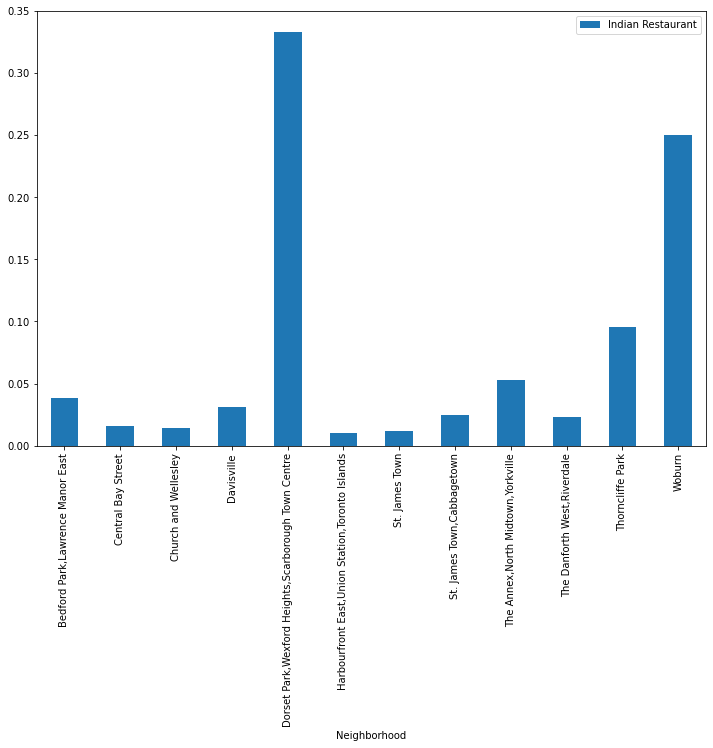

In [56]:
#Toronto_Indian_Restaurant[["Indian Restaurant" > "0"]]
Toronto_Indian_Restaurant.loc[Toronto_Indian_Restaurant['Indian Restaurant'] > 0].plot(kind='bar',x='Neighborhood', figsize=(12,8))

### Extracting Indian Ethinic population by Riding/Neighborhood and combining into single dataframe

Data Cleansing

Standardizing Column names for each dataframe

In [91]:
for name in [df_pop_tor_eyrk,df_pop_nyrk,df_pop_scrb,df_pop_eto]:
    for i, val in enumerate(name.columns.values):
        if val == "%":
            name.columns.values[i] = ('Ethnic Origin #1 %')
        else:
            for j in range(9):
                if val=="%."+str(j):
                    name.columns.values[i] = ('Ethnic Origin #'+str(j+1)+' %')        
    print("Columns: ",name.columns)
    print("Columns: ",name.columns)

Columns:  Riding                 object
Population              int64
Ethnic Origin #1       object
Ethnic Origin #1 %    float64
Ethnic Origin #2       object
Ethnic Origin #2 %    float64
Ethnic Origin #3       object
Ethnic Origin #3 %    float64
Ethnic Origin #4       object
Ethnic Origin #4 %    float64
Ethnic Origin #5       object
Ethnic Origin #5 %    float64
Ethnic Origin #6       object
Ethnic Origin #6 %    float64
Ethnic Origin #7       object
Ethnic Origin #7 %    float64
Ethnic Origin #8       object
Ethnic Origin #8 %    float64
Ethnic Origin #9       object
Ethnic Origin #9 %    float64
dtype: object
Columns:  Riding                 object
Population              int64
Ethnic Origin #1       object
Ethnic Origin #1 %    float64
Ethnic Origin #2       object
Ethnic Origin #2 %    float64
Ethnic Origin #3       object
Ethnic Origin #3 %    float64
Ethnic Origin #4       object
Ethnic Origin #4 %    float64
Ethnic Origin #5       object
Ethnic Origin #5 %    float64
Ethnic

Index(['Riding', 'Population', 'Ethnic Origin #1', 'Ethnic Origin #1 %',
       'Ethnic Origin #2', 'Ethnic Origin #2 %', 'Ethnic Origin #3',
       'Ethnic Origin #3 %', 'Ethnic Origin #4', 'Ethnic Origin #4 %',
       'Ethnic Origin #5', 'Ethnic Origin #5 %', 'Ethnic Origin #6',
       'Ethnic Origin #6 %', 'Ethnic Origin #7', 'Ethnic Origin #7 %',
       'Ethnic Origin #8', 'Ethnic Origin #8 %'],
      dtype='object')
